<a href="https://colab.research.google.com/github/LucasAlbFar/analise_dados_hepatite_brasil/blob/main/notebooks/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [259]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker
import numpy as np
import statistics

plt.rc('figure', figsize=(20,9))
pd.set_option('display.float_format', lambda x: '%.2f' % x)

## **Carregando dados das doses de vacinas aplicadas entre os anos de 1998 e 2020**

In [407]:
url = 'https://raw.githubusercontent.com/LucasAlbFar/analise_dados_hepatite_brasil/main/dados/doses_aplicadas_por_ano_1994_2021.csv'

In [408]:
doses_aplicadas = pd.read_csv(url, encoding="ISO-8859-1", sep=";", thousands='.', decimal=',')
doses_aplicadas = doses_aplicadas.drop(['1994', '1995', '1996', '1997'], axis=1) # removendo coluna dos anos abaixo de 1998

doses_aplicadas['Unidade da Federação'] = [(estado[3:]) for estado in doses_aplicadas['Unidade da Federação']] # renomeando coluna UNIDADE DA FEDEREACAO
doses_aplicadas = doses_aplicadas.set_index('Unidade da Federação')                                            # UF's como indíce

total_doses_por_ano = doses_aplicadas.iloc[-1:].T     # salvando o total por ano 
doses_aplicadas = doses_aplicadas.iloc[:-1 , :] # removendo última linha 

total_doses_por_uf =  doses_aplicadas.iloc[: , -1:]   # salvando total por uf
doses_aplicadas = doses_aplicadas.iloc[: , :-2] # removendo coluna total e ano de 2021

doses_aplicadas = doses_aplicadas.astype(int)
doses_aplicadas

,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,
Rondônia,284513,242985,206296,292553,168095,144339,128169,163340,150128,130536,158254,152052,142750,156774,145596,139752,157942,158399,129642,99495,92868,92366,71858
Acre,67947,1305380,98465,102509,84525,84971,73776,75675,67871,83924,95347,105503,102222,117360,106904,72409,50955,53746,39248,45873,43463,45925,30880
Amazonas,346619,496898,434945,481011,446048,396598,326329,356846,350897,374693,361393,358219,343181,356573,337960,291348,326899,297631,181756,245458,271990,273327,210123
Roraima,130516,94311,106533,67228,68692,69055,58151,80040,71139,69688,77781,67499,70721,68763,62036,58081,70284,70289,42897,86875,90442,77269,55667
Pará,303487,1565678,801902,1090151,1338385,1298510,834766,796893,746010,753835,717106,655370,661978,707089,714286,705853,568474,444935,267492,432441,389415,407324,331734
Amapá,71395,138089,109414,154072,109364,91928,66098,65280,61688,60916,77572,70762,86950,77110,72390,53680,54348,60370,47575,50889,43991,45813,27905
Tocantins,342615,367434,298045,267479,222614,203614,142491,150169,128696,122637,125628,106307,118082,126214,110612,129179,139990,103585,59184,90441,80323,83442,68392
Maranhão,217434,1752105,1303390,999999,831603,744063,656124,663516,642167,619627,630308,601414,693618,797951,751562,692688,647301,624073,339966,505626,433489,405860,306017
Piauí,4427,187320,273151,360373,282231,656926,405909,322608,277908,287079,233866,238804,242285,313273,272943,270824,250057,180644,106730,160172,145106,155048,128168


In [409]:
doses_aplicadas.isnull().sum().sum()  # confirmando que não há dados nulos

0

In [ ]:
total_doses_por_ano = total_doses_por_ano.iloc[:-2 , :] # remoção da última linha 'Total' e ano 2021
total_doses_por_ano = total_doses_por_ano.reset_index()
total_doses_por_ano.columns = ['Ano', 'Total']
total_doses_por_ano.set_index('Ano', inplace=True)

## **Carregando dados dos óbitos por hepatites, entre os anos de 1998 e 2020**

In [267]:
url = 'https://raw.githubusercontent.com/LucasAlbFar/analise_dados_hepatite_brasil/main/dados/morbilidade_hospitalar_sus_1995_2007.csv'

In [268]:
obitos_hepatite_1998_2007 = pd.read_csv(url, encoding="ISO-8859-1",skiprows=4, sep=";", skipfooter=1, thousands='.', decimal=',')

obitos_hepatite_1998_2007['Unidade da Federação'] = [(estado[3:]) for estado in obitos_hepatite_1998_2007['Unidade da Federação']] # renomeando coluna UNIDADE DA FEDEREACAO
obitos_hepatite_1998_2007 = obitos_hepatite_1998_2007.set_index('Unidade da Federação')                                            # UF's como indíce

total_obitos_por_ano_1998_2007 = obitos_hepatite_1998_2007.iloc[-1:].T     # salvando o total por ano 
obitos_hepatite_1998_2007 = obitos_hepatite_1998_2007.iloc[:-1 , :] # removendo última linha 
obitos_hepatite_1998_2007 = obitos_hepatite_1998_2007.iloc[:-1 , :] # removendo última linha 

total_obitos_por_uf_1998_2007 =  obitos_hepatite_1998_2007.iloc[: , -1:]   # salvando total por uf
obitos_hepatite_1998_2007 = obitos_hepatite_1998_2007.iloc[: , :-1] # removendo coluna total

obitos_hepatite_1998_2007 = obitos_hepatite_1998_2007.replace('-', 0)
obitos_hepatite_1998_2007 = obitos_hepatite_1998_2007.astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [269]:
url = 'https://raw.githubusercontent.com/LucasAlbFar/analise_dados_hepatite_brasil/main/dados/morbilidade_hospitalar_sus_2008_2021.csv'

In [270]:
obitos_hepatite_2008_2020 = pd.read_csv(url, encoding="ISO-8859-1",skiprows=4, sep=";", skipfooter=6, thousands='.', decimal=',')

obitos_hepatite_2008_2020['Unidade da Federação'] = [(estado[3:]) for estado in obitos_hepatite_2008_2020['Unidade da Federação']] # renomeando coluna UNIDADE DA FEDEREACAO
obitos_hepatite_2008_2020 = obitos_hepatite_2008_2020.set_index('Unidade da Federação')                                            # UF's como indíce

total_obitos_por_ano_2008_2020 = obitos_hepatite_2008_2020.iloc[-1:].T     # salvando o total por ano 
obitos_hepatite_2008_2020 = obitos_hepatite_2008_2020.iloc[:-1 , :] # removendo última linha 

total_obitos_por_uf_2008_2020 =  obitos_hepatite_2008_2020.iloc[: , -1:]   # salvando total por uf
obitos_hepatite_2008_2020 = obitos_hepatite_2008_2020.iloc[: , :-2] # removendo coluna total e do ano 2021

obitos_hepatite_2008_2020 = obitos_hepatite_2008_2020.replace('-', 0)
obitos_hepatite_2008_2020 = obitos_hepatite_2008_2020.astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [271]:
obitos_hepatite = pd.merge(obitos_hepatite_1998_2007, obitos_hepatite_2008_2020, on='Unidade da Federação')
obitos_hepatite

,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,
Rondônia,9,10,6,13,9,12,5,8,10,8,8,11,8,4,16,14,11,10,11,15,14,17,3
Acre,5,16,15,11,26,22,39,18,27,19,18,22,25,23,20,17,25,17,25,17,24,23,12
Amazonas,13,21,13,15,16,15,21,19,11,8,14,11,20,14,16,16,22,10,24,18,12,18,29
Roraima,2,2,1,2,1,2,1,4,1,1,1,4,4,0,1,0,1,2,1,1,1,2,2
Pará,23,33,26,28,19,30,34,34,22,30,19,19,15,11,19,17,21,17,12,9,15,18,17
Amapá,1,4,0,6,2,0,1,5,0,1,3,4,2,3,3,4,1,2,3,2,1,0,0
Tocantins,0,5,1,2,1,1,4,7,4,6,6,1,6,3,1,3,2,1,1,1,1,0,1
Maranhão,25,24,12,13,22,20,24,26,27,17,10,8,13,23,16,17,15,27,8,10,12,3,3
Piauí,3,7,12,5,8,5,15,12,14,5,7,8,5,7,12,3,9,3,4,7,5,4,3


In [272]:
obitos_hepatite.isnull().sum().sum() # confirmando que não há dados nulos

0

In [ ]:
total_obitos_por_ano_1998_2007 = total_obitos_por_ano_1998_2007.iloc[:-1 , :] # remoção da última linha 'Total'
total_obitos_por_ano_1998_2007 = total_obitos_por_ano_1998_2007.reset_index()
total_obitos_por_ano_1998_2007.columns = ['Ano', 'Total']
total_obitos_por_ano_1998_2007.set_index('Ano', inplace=True)
total_obitos_por_ano_2008_2020 = total_obitos_por_ano_2008_2020.iloc[:-1 , :] # remoção da última linha 'Total'
total_obitos_por_ano_2008_2020 = total_obitos_por_ano_2008_2020.iloc[:-1 , :] # remoção da última linha 2021
total_obitos_por_ano_2008_2020 = total_obitos_por_ano_2008_2020.reset_index()
total_obitos_por_ano_2008_2020.columns = ['Ano', 'Total']
total_obitos_por_ano_2008_2020.set_index('Ano', inplace=True)
total_obitos_por_ano = pd.concat([total_obitos_por_ano_1998_2007, total_obitos_por_ano_2008_2020])
total_obitos_por_ano = total_obitos_por_ano.astype(int)

In [ ]:
total_obitos_por_uf = total_obitos_por_uf_1998_2007 + total_obitos_por_uf_2008_2020

## **Carregando os dados referentes aos valores totais gastos em hospitais públicos em casos de mobilidade associadas à hepatite aguda tipo B e outras hepatites virais**

In [275]:
url = 'https://raw.githubusercontent.com/LucasAlbFar/analise_dados_hepatite_brasil/main/dados/valor_total_morbilidade_hospitalar_sus_1995_2007.csv'

In [276]:
valor_obitos_hepatite_1998_2007 = pd.read_csv(url, encoding="ISO-8859-1",skiprows=4, sep=";", skipfooter=1, thousands='.', decimal=',')

valor_obitos_hepatite_1998_2007['Unidade da Federação'] = [(estado[3:]) for estado in valor_obitos_hepatite_1998_2007['Unidade da Federação']] # renomeando coluna UNIDADE DA FEDEREACAO
valor_obitos_hepatite_1998_2007 = valor_obitos_hepatite_1998_2007.set_index('Unidade da Federação')   

total_valor_obitos_por_ano_1998_2007 = valor_obitos_hepatite_1998_2007.iloc[-1:].T   # salvando o total por ano 
valor_obitos_hepatite_1998_2007 = valor_obitos_hepatite_1998_2007.iloc[:-1 , :]      # removendo última linha 
valor_obitos_hepatite_1998_2007 = valor_obitos_hepatite_1998_2007.iloc[:-1 , :]      # removendo última linha 

total_valor_obitos_por_uf_1998_2007 =  valor_obitos_hepatite_1998_2007.iloc[: , -1:]   # salvando total por uf
valor_obitos_hepatite_1998_2007 = valor_obitos_hepatite_1998_2007.iloc[: , :-1]        # removendo coluna total
valor_obitos_hepatite_1998_2007 = valor_obitos_hepatite_1998_2007.replace('-', np.nan) # substituindo dados inválidos por NaN
valor_obitos_hepatite_1998_2007 = valor_obitos_hepatite_1998_2007.astype('float64')    # conversão para float 
valor_obitos_hepatite_1998_2007 = valor_obitos_hepatite_1998_2007.fillna(valor_obitos_hepatite_1998_2007.interpolate()) # preenchendo campos Nan com interpolação


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [277]:
url = 'https://raw.githubusercontent.com/LucasAlbFar/analise_dados_hepatite_brasil/main/dados/valor_total_morbilidade_hospitalar_sus_2008_2021.csv'

In [278]:
valor_obitos_hepatite_2008_2020 = pd.read_csv(url, encoding="ISO-8859-1",skiprows=4, sep=";", skipfooter=6, thousands='.', decimal=',')

valor_obitos_hepatite_2008_2020['Unidade da Federação'] = [(estado[3:]) for estado in valor_obitos_hepatite_2008_2020['Unidade da Federação']] # renomeando coluna UNIDADE DA FEDEREACAO
valor_obitos_hepatite_2008_2020 = valor_obitos_hepatite_2008_2020.set_index('Unidade da Federação')   

total_valor_obitos_por_ano_2008_2020 = valor_obitos_hepatite_2008_2020.iloc[-1:].T   # salvando o total por ano 
valor_obitos_hepatite_2008_2020 = valor_obitos_hepatite_2008_2020.iloc[:-1 , :]      # removendo última linha 
# valor_obitos_hepatite_2008_2020 = valor_obitos_hepatite_2008_2020.iloc[:-1 , :]      # removendo última linha

total_valor_obitos_por_uf_2008_2020 =  valor_obitos_hepatite_2008_2020.iloc[: , -1:]   # salvando total por uf
valor_obitos_hepatite_2008_2020 = valor_obitos_hepatite_2008_2020.iloc[: , :-2]        # removendo coluna total e do ano 2021
valor_obitos_hepatite_2008_2020 = valor_obitos_hepatite_2008_2020.replace('-', np.nan) # substituindo dados inválidos por NaN
valor_obitos_hepatite_2008_2020 = valor_obitos_hepatite_2008_2020.astype('float64')   # conversão para float 
valor_obitos_hepatite_2008_2020 = valor_obitos_hepatite_2008_2020.fillna(valor_obitos_hepatite_2008_2020.interpolate()) # preenchendo campos Nan com interpolação


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [279]:
valor_obitos_hepatite = pd.merge(valor_obitos_hepatite_1998_2007, valor_obitos_hepatite_2008_2020, on='Unidade da Federação')
valor_obitos_hepatite

,1998/Jan,1998/Fev,1998/Mar,1998/Abr,1998/Mai,1998/Jun,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Nov,1998/Dez,1999/Jan,1999/Fev,1999/Mar,1999/Abr,1999/Mai,1999/Jun,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,2000/Abr,2000/Mai,2000/Jun,2000/Jul,2000/Ago,2000/Set,2000/Out,2000/Nov,2000/Dez,2001/Jan,2001/Fev,2001/Mar,2001/Abr,...,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Rondônia,2518.22,5406.73,4699.43,2170.66,5301.20,2712.72,6366.34,4231.80,5624.22,3202.75,6544.78,3754.94,2182.95,4712.08,3509.79,4661.19,6749.75,4303.31,3910.32,4433.78,5868.69,3677.66,4953.13,3703.39,7353.18,5693.66,7432.10,7094.03,7168.86,3282.68,7547.47,6743.98,6207.06,7355.96,8856.38,9964.85,10303.27,9980.35,9613.53,10032.38,...,7980.51,2153.59,76473.80,5961.43,21223.17,6900.26,7429.53,3770.00,5472.79,3241.09,4281.26,6313.65,2069.62,4982.00,12724.83,3276.36,7809.67,4608.16,5245.23,4362.13,6690.93,25427.91,20323.12,5281.65,12014.81,2904.59,11213.79,5638.73,3039.92,2977.26,2399.46,3072.62,1543.59,963.39,756.96,653.63,446.22,1735.22,3814.39,1319.76
Acre,426.50,2138.75,2696.93,2463.00,3298.52,2239.23,2080.88,4371.83,3638.70,4196.50,5971.82,1386.19,4233.96,3750.85,2450.81,4638.51,4667.67,2591.91,2816.78,2664.06,4637.06,7011.64,6300.56,5427.82,6606.81,6827.84,3508.07,2824.70,7437.41,3353.69,6006.17,3127.95,3021.60,4609.67,4621.48,4294.42,5520.20,3628.60,8556.06,6662.24,...,10102.28,1694.99,6728.54,11172.19,16410.84,4187.07,2003.87,6189.49,75703.32,6715.71,15828.57,32993.66,7673.73,5386.18,7004.18,7244.37,12113.22,13594.24,3848.65,4659.37,5817.61,8782.43,6147.12,14990.02,5634.24,17219.51,15285.40,5344.90,2362.85,1987.15,6212.46,2288.03,2135.23,13383.72,3551.78,1353.79,8999.54,8990.53,769.77,1407.07
Amazonas,2934.12,4873.82,3818.28,4758.15,5844.10,5885.59,6796.07,4827.48,3842.29,3459.94,3273.56,4415.14,6681.71,4987.99,5892.30,5785.01,4734.30,4641.65,3268.10,6010.29,4261.31,4724.81,5886.13,8624.48,6712.46,5066.16,9681.68,6654.09,9944.33,5137.99,4837.53,8246.97,5216.07,3938.99,7192.99,8128.77,4376.06,4581.31,4965.15,7208.43,...,5393.00,9083.77,1870.74,15049.19,5658.72,5252.85,97799.27,3457.92,2980.02,2437.18,5365.04,4033.52,4397.51,6186.12,102317.08,5298.88,4302.87,15705.03,12457.83,6385.83,6552.66,13282.55,7026.06,6372.83,7561.50,5436.03,1900.65,6662.58,8988.03,12301.56,8755.96,5573.32,5800.35,11936.91,2393.37,7392.01,3665.14,3978.73,8347.16,16099.21
Roraima,95.93,106.75,85.30,85.30,660.10,426.52,319.89,106.63,319.89,945.73,426.52,213.26,692.27,639.78,532.82,746.41,213.26,666.37,426.52,453.34,418.36,198.97,464.37,18386.08,16598.65,19299.31,19650.11,18853.04,17778.58,16500.40,893.73,1319.95,239.35,547.85,493.42,40.38,348.88,634.28,158.59,516.15,...,8123.47,44.22,1002.98,11799.82,7102.65,6753.22,267.11,665.09,9222.72,5189.20,7366.64,777.27,6291.21,7647.75,318.07,1255.74,116898.39,12378.21,1427.86,562.54,267.11,541.24,9194.13,328.19,7689.49,9472.80,857.58,6224.02,328.19,893.46,1577.05,1659.23,282.13,7215.80,826.55,5885.40,5042.50,3360.41,6562.62,306.59
Pará,7554.67,8424.74,14703.97,12560.54,13724.84,21870.50,16818.53,17934.18,16076.59,18707.26,17212.66,20220.03,18695.14,19337.41,16178.25,16142.57,19428.87,18189.06,17197.39,16347.45,16410.37,24039.98,26823.07,28147.69,26484.83,33532.45,29618.55,31051.99,25612.82,27862.82,26572.83,24925.80,28029.02,37313.19,31864.21,30001.21,30780.56,31117.57,26713.40,31563.64,...,10853.93,10100.97,33942.59,8550.44,8546.58,8253.58,4519.08,8410.84,15465.42,7941.23,9368.23,9215.84,8184.91,9109.39,102409.72,6341.28,9528.25,9051.39,108190.26,7329.06,5348.49,10381.72,6087.73,8420.01,7817.48,13509.

In [280]:
valor_obitos_hepatite.isnull().sum().sum()  # confirmando que não há dados nulos

0

In [ ]:
total_valor_obitos_por_ano_1998_2007 = total_valor_obitos_por_ano_1998_2007.iloc[:-1 , :] # remoção da última linha 'Total'
total_valor_obitos_por_ano_1998_2007 = total_valor_obitos_por_ano_1998_2007.reset_index()
total_valor_obitos_por_ano_1998_2007.columns = ['Ano', 'Total']
total_valor_obitos_por_ano_1998_2007.set_index('Ano', inplace=True)

total_valor_obitos_por_ano_2008_2020 = total_valor_obitos_por_ano_2008_2020.iloc[:-1 , :] # remoção da última linha 'Total'
total_valor_obitos_por_ano_2008_2020 = total_valor_obitos_por_ano_2008_2020.iloc[:-1 , :] # remoção da última linha 2021
total_valor_obitos_por_ano_2008_2020 = total_valor_obitos_por_ano_2008_2020.reset_index()
total_valor_obitos_por_ano_2008_2020.columns = ['Ano', 'Total']
total_valor_obitos_por_ano_2008_2020.set_index('Ano', inplace=True)

total_valor_obitos_por_ano = pd.concat([total_valor_obitos_por_ano_1998_2007, total_valor_obitos_por_ano_2008_2020])

In [ ]:
total_valor_obitos_por_uf = total_valor_obitos_por_uf_1998_2007 + total_valor_obitos_por_uf_2008_2020

## **Carregando dados da população residente entre 1998 e 2020**

In [283]:
url = 'https://raw.githubusercontent.com/LucasAlbFar/analise_dados_hepatite_brasil/main/dados/populaca_residente_1995_2012.csv'

In [284]:
populacao_1998_2012 = pd.read_csv(url, encoding="ISO-8859-1",skiprows=3, sep=";", skipfooter=12, thousands='.', decimal=',')
populacao_1998_2012 = populacao_1998_2012.drop(['1995', '1996', '1997'], axis=1) # removendo coluna dos anos abaixo de 1998

populacao_1998_2012['Unidade da Federação'] = [(estado[3:]) for estado in populacao_1998_2012['Unidade da Federação']] # renomeando coluna UNIDADE DA FEDEREACAO
populacao_1998_2012 = populacao_1998_2012.set_index('Unidade da Federação')   

total_populaco_por_ano_1998_2012 = populacao_1998_2012.iloc[-1:].T   # salvando o total por ano 
populacao_1998_2012 = populacao_1998_2012.iloc[:-1 , :]      # removendo última linha 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [285]:
url = 'https://raw.githubusercontent.com/LucasAlbFar/analise_dados_hepatite_brasil/main/dados/populaca_residente_2013_2020.csv' # estimativa pop 

In [286]:
populacao_2013_2020 = pd.read_csv(url, encoding="ISO-8859-1",skiprows=3, sep=";", skipfooter=4, thousands='.', decimal=',')

populacao_2013_2020['Unidade da Federação'] = [(estado[3:]) for estado in populacao_2013_2020['Unidade da Federação']] # renomeando coluna UNIDADE DA FEDEREACAO
populacao_2013_2020 = populacao_2013_2020.set_index('Unidade da Federação')   

total_populaco_por_ano_2013_2020 = populacao_2013_2020.iloc[-1:].T   # salvando o total por ano 
populacao_2013_2020 = populacao_2013_2020.iloc[:-1 , :]      # removendo última linha 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [287]:
populacao_total = pd.merge(populacao_1998_2012, populacao_2013_2020, on='Unidade da Federação')
populacao_total

,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,
Rondônia,1276181,1296832,1379787,1407878,1431776,1455914,1479940,1534584,1562406,1590027,1493566,1503911,1562409,1576455,1590011,1657620,1677766,1698263,1717911,1737578,1757589,1777225,1796460
Acre,514059,527926,557526,574366,586945,600607,614205,669737,686650,703447,680073,691169,733559,746386,758786,805014,818273,831665,844137,856457,869265,881935,894470
Amazonas,2520694,2580839,2812557,2900218,2961804,3031079,3100136,3232319,3311046,3389081,3341096,3393357,3483985,3538387,3590985,3751293,3819636,3887740,3952171,4015812,4080611,4144597,4207714
Roraima,260701,266914,324397,337253,346866,357296,367701,391318,403340,415281,412783,421497,450479,460165,469524,491066,501970,513328,525967,546885,576568,605761,631181
Pará,5768451,5886463,6192307,6341711,6453699,6574990,6695940,6970591,7110462,7249184,7321493,7431041,7581051,7688593,7822205,8054419,8149418,8244575,8334346,8422634,8513497,8602865,8690745
Amapá,420839,439783,477032,498735,516514,534821,553100,594577,615724,636652,613164,626607,669526,684309,698602,744809,762156,779416,796419,813084,829494,845731,861773
Tocantins,1107806,1134879,1157098,1184855,1207008,1230188,1253256,1305708,1332443,1358889,1280509,1292063,1383445,1400892,1417694,1467474,1485318,1503482,1520448,1537350,1555229,1572866,1590248
Maranhão,5356831,5418354,5651475,5730432,5803283,5873646,5943807,6103338,6184543,6265102,6305539,6367111,6574789,6645761,6714314,6836179,6875302,6916244,6955099,6994148,7035055,7075181,7114598
Piauí,2714928,2734158,2843278,2872983,2898191,2923695,2949133,3006886,3036271,3065488,3119697,3145164,3118360,3140328,3160748,3221407,3229320,3238459,3246999,3255400,3264531,3273227,3281480


In [288]:
populacao_total.isnull().sum().sum() # confirmando que não há dados nulos

0

In [ ]:
total_populaco_por_ano_1998_2012 = total_populaco_por_ano_1998_2012.reset_index()
total_populaco_por_ano_1998_2012.columns = ['Ano', 'Total']
total_populaco_por_ano_1998_2012.set_index('Ano', inplace=True)

total_populaco_por_ano_2013_2020 = total_populaco_por_ano_2013_2020.reset_index()
total_populaco_por_ano_2013_2020.columns = ['Ano', 'Total']
total_populaco_por_ano_2013_2020.set_index('Ano', inplace=True)

total_populaco_por_ano = pd.concat([total_populaco_por_ano_1998_2012, total_populaco_por_ano_2013_2020])

## Após os dados carregados e normalizados vamos iniciar as análises dos dados referentes à 1998, iniciando com os óbitos em cada estado

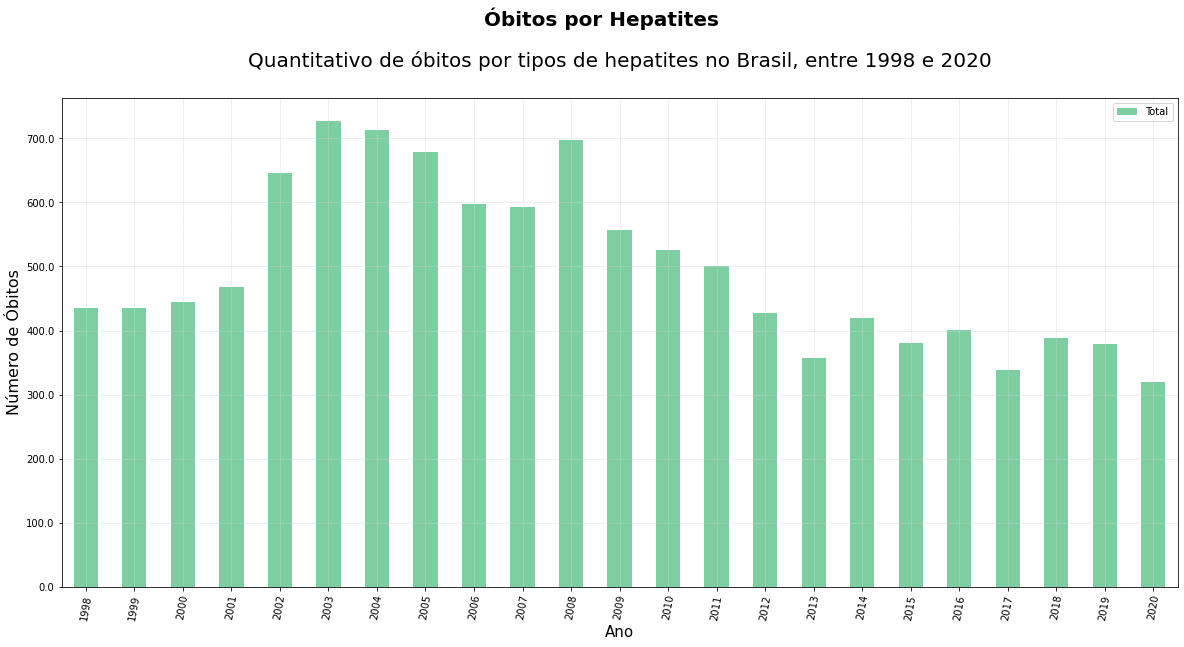

In [290]:
# ax = total_obitos_por_ano.sort_values(by='Total', ascending=False).plot(y='Total', kind='bar',color="#7DCEA0")
ax = total_obitos_por_ano.plot(y='Total', kind='bar',color="#7DCEA0")
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,}'))

plt.suptitle("Óbitos por Hepatites", size=20, weight='bold' ).set_position([.5, 1.02])
plt.title('Quantitativo de óbitos por tipos de hepatites no Brasil, entre 1998 e 2020', {'fontsize': 20}).set_position([.5, 1.05])

plt.ylabel("Número de Óbitos", size = 16)
plt.xlabel("Ano", size = 15)
plt.xticks(rotation=80)
plt.grid(color='lightgrey', linestyle='--', linewidth=.5)
plt.show()

## Como visto no gráfico acima, os anos 2003, 2004 e 2008 foram os mais críticos para óbitos relacionados à hepatites. Para uma melhor compreensão desse cenário, vamos analisar as curvas de cadas estado para o ano de 2003 e encontrar algum ponto importante sobre a hepatite afetou o sistema de saúde público

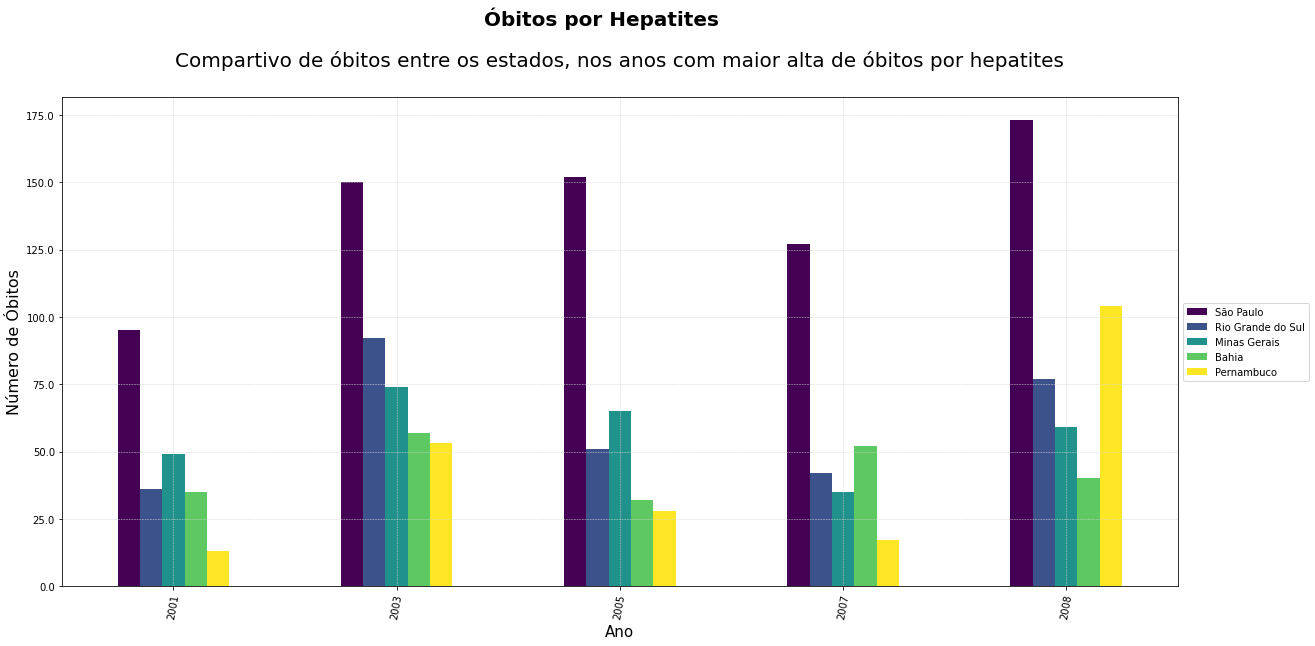

In [397]:
ax = obitos_hepatite[['2001','2003', '2005', '2007', '2008']].sort_values(by='2003', ascending=False).head().T.plot(kind='bar', colormap = 'viridis')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,}'))

plt.suptitle("Óbitos por Hepatites", size=20, weight='bold' ).set_position([.5, 1.02])
plt.title('Compartivo de óbitos entre os estados, nos anos com maior alta de óbitos por hepatites',{'fontsize': 20}).set_position([.5, 1.05])

plt.ylabel("Número de Óbitos", size = 16)
plt.xlabel("Ano", size = 15)
plt.xticks(rotation=80)
plt.grid(color='lightgrey', linestyle='--', linewidth=.5)
plt.show()

## Tendo identificado São Paulo, Rio Grande do Sul, Minas Gerais, Bahia e Pernambuco como os estados mais aflingidos por óbitos relacionadas à hepatite nos anos de 2003, 2004 e 2008, vamos analisar o impacto dessas mortes nos orçamentos dos hospitais pagos pelo SUS entre 1998 e 2008

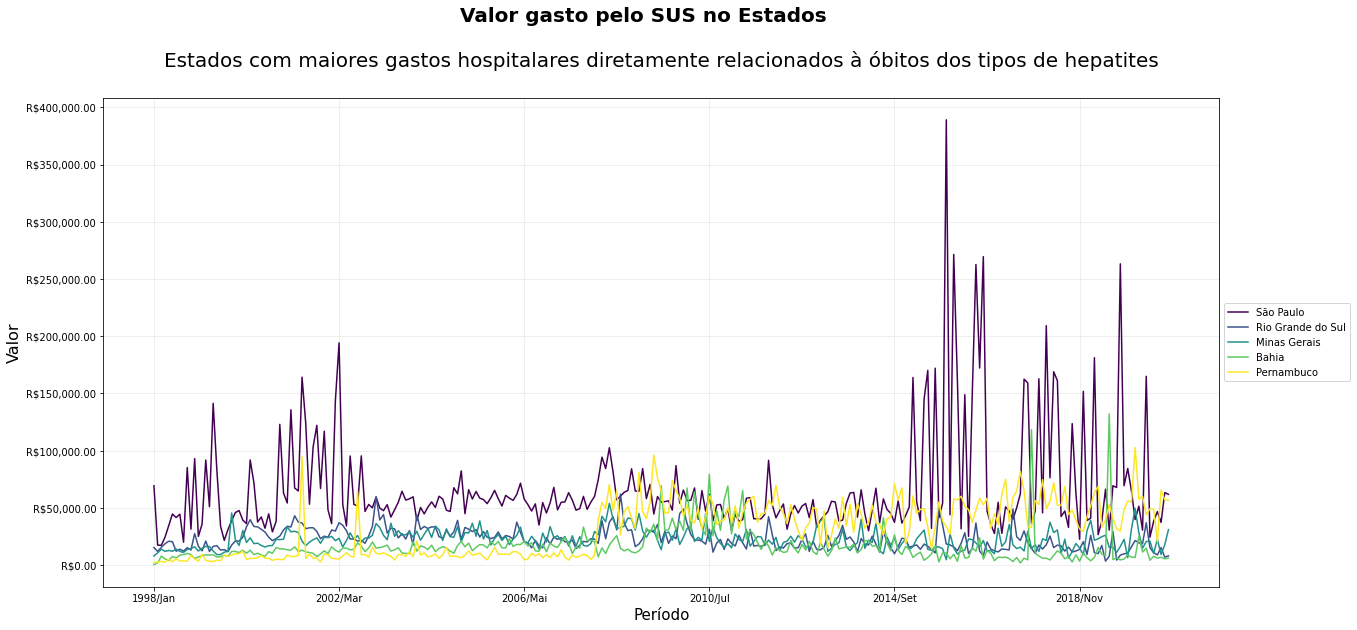

In [398]:
# valor_obito_ate_2008 = valor_obitos_hepatite.iloc[:,:180]
valor_obito_ate_2008 = valor_obitos_hepatite
valor_obito_ate_2008 = valor_obito_ate_2008.loc[['São Paulo', 'Rio Grande do Sul', 'Minas Gerais', 'Bahia','Pernambuco']]
valor_obito_ate_2008 = valor_obito_ate_2008.astype(float)

ax=valor_obito_ate_2008.T.plot(colormap = 'viridis')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('R${x:,.2f}'))
plt.title('Estados com maiores gastos hospitalares diretamente relacionados à óbitos dos tipos de hepatites',{'fontsize': 20}).set_position([.5, 1.05])
plt.suptitle("Valor gasto pelo SUS no Estados", size=20, weight='bold' ).set_position([.5, 1.02])
plt.ylabel("Valor", size = 16)
plt.xlabel("Período", size = 15)
plt.grid(color='lightgrey', linestyle='--', linewidth=.5)

plt.show()

## Ao analisar somente as curvas dos gastos dos cinco estados com mais óbitos por tipos de hepatites pelo perído de 1998 à 2012, podemos visualizar alguns picos onde os gastos foram acima do restante do período. Porém, para melhor entendimento do impacto desses valores, vamos analisar esses dados relacionando tamanho médio da população na base por 100 mil habitantes, entre 1998 e 2020

In [467]:
obitos_detalhado = pd.DataFrame(valor_obitos_hepatite.T.sum())

obitos_detalhado = obitos_detalhado.reset_index()
obitos_detalhado.columns = ['Unidade da Federação', 'Total Gasto com óbitos']
obitos_detalhado.set_index('Unidade da Federação', inplace=True)

obitos_detalhado['Total de Óbitos'] = obitos_hepatite.T.sum()
obitos_detalhado['População Média'] = populacao_total.T.mean()

obitos_detalhado['Gasto óbitos à cada 100mil Habitantes'] = (obitos_detalhado['Total Gasto com óbitos'] / obitos_detalhado['População Média']) * 100000
obitos_detalhado['Óbitos à cada 100mil Habitantes'] = (obitos_detalhado['Total de Óbitos'] / obitos_detalhado['População Média']) * 100000

obitos_detalhado = obitos_detalhado.sort_values(by='Gasto óbitos à cada 100mil Habitantes', ascending=False)
# obitos_detalhado = obitos_detalhado.sort_values(by='Óbitos à cada 100mil Habitantes', ascending=False)
obitos_detalhado

,Total Gasto com óbitos,Total de Óbitos,População Média,Gasto óbitos à cada 100mil Habitantes,Óbitos à cada 100mil Habitantes
Unidade da Federação,,,,,
Acre,2665605.78,466,715072.04,372774.44,65.17
Roraima,923309.41,37,438184.39,210712.53,8.44
Rondônia,1674905.52,232,1563569.09,107120.66,14.84
Pernambuco,8498777.00,1138,8713073.91,97540.51,13.06
Pará,6477290.43,488,7395681.74,87582.06,6.60
Amazonas,2649446.69,376,3436832.91,77089.77,10.94
Amapá,491030.67,48,652733.35,75226.84,7.35
Tocantins,792396.16,58,1359962.96,58266.01,4.26
Rio Grande do Sul,6224096.77,921,10814207.35,57554.81,8.52


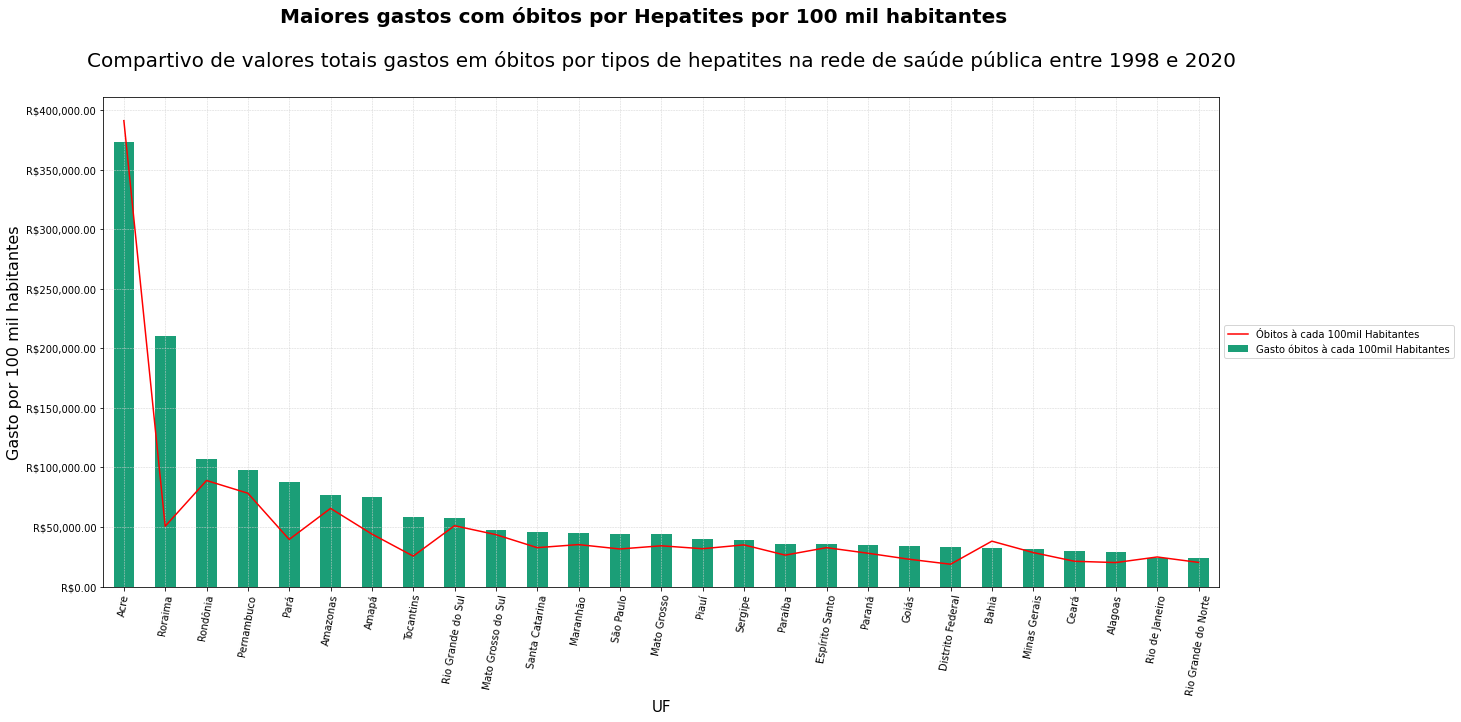

In [468]:
ax = (obitos_detalhado['Óbitos à cada 100mil Habitantes']*6000).plot(color='red') 
ax = obitos_detalhado['Gasto óbitos à cada 100mil Habitantes'].plot(kind='bar', colormap = 'Dark2')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('R${x:,.2f}'))

plt.suptitle("Maiores gastos com óbitos por Hepatites por 100 mil habitantes", size=20, weight='bold' ).set_position([.5, 1.02])
plt.title('Compartivo de valores totais gastos em óbitos por tipos de hepatites na rede de saúde pública entre 1998 e 2020',{'fontsize': 20}).set_position([.5, 1.05])

plt.ylabel("Gasto por 100 mil habitantes", size = 16)
plt.xlabel("UF", size = 15)
plt.xticks(rotation=80)
plt.grid(color='lightgrey', linestyle='--', linewidth=.5)
plt.show()

## Através do gráfico anterior, identificamos um padrão entre gastos totais com óbitos por hepatite à cada 100 mil habitantes e, os óbitos também na base de 100 mil habitantes. Fica evidenciado como os variados tipos de hepatite impactaram os estados do Acre e de Roraima, tanto na sua população quanto aos cofres do poder público. Portanto, analisar somente os gastos no período de maiores altas de óbitos (2002 à 2008), não foi a melhor estratégia para avaliar o impacto dessa doença na população e no orçamento público, visto que São Paulo, Rio Grande do Sul e Minas Gerais, foram os que, em valores absolutos, tiveram maiores gastos com os óbitos e em números da casos.

## Outro aspecto a ser considerado, é a vacinação contra hepatites virais do tipos A e B. À seguir, é exibido um análise similiar ao realizado acima, identificando quais os estados que mais vacinaram sua população.

In [453]:
vacina_detalhado = total_doses_por_uf
vacina_detalhado = vacina_detalhado.rename(columns={' Total': 'Total de vacinas aplicadas'})

vacina_detalhado['População Média'] = populacao_total.T.mean()
vacina_detalhado['Porcentagem da população vacinada'] = (vacina_detalhado['População Média']/vacina_detalhado['Total de vacinas aplicadas']) * 100

vacina_detalhado = vacina_detalhado.sort_values(by='Porcentagem da população vacinada', ascending=False)
vacina_detalhado

,Total de vacinas aplicadas,População Média,Porcentagem da população vacinada
Unidade da Federação,,,
Rio Grande do Sul,17697789,10814207.35,61.10
Rio de Janeiro,27736256,15823910.48,57.05
Minas Gerais,36484953,19578066.96,53.66
Piauí,5795318,3075657.87,53.07
Goiás,11308669,5956586.96,52.67
Paraíba,7186275,3724662.09,51.83
Rio Grande do Norte,6068998,3129926.65,51.57
Bahia,28399698,14064337.43,49.52
São Paulo,84161702,41377308.91,49.16


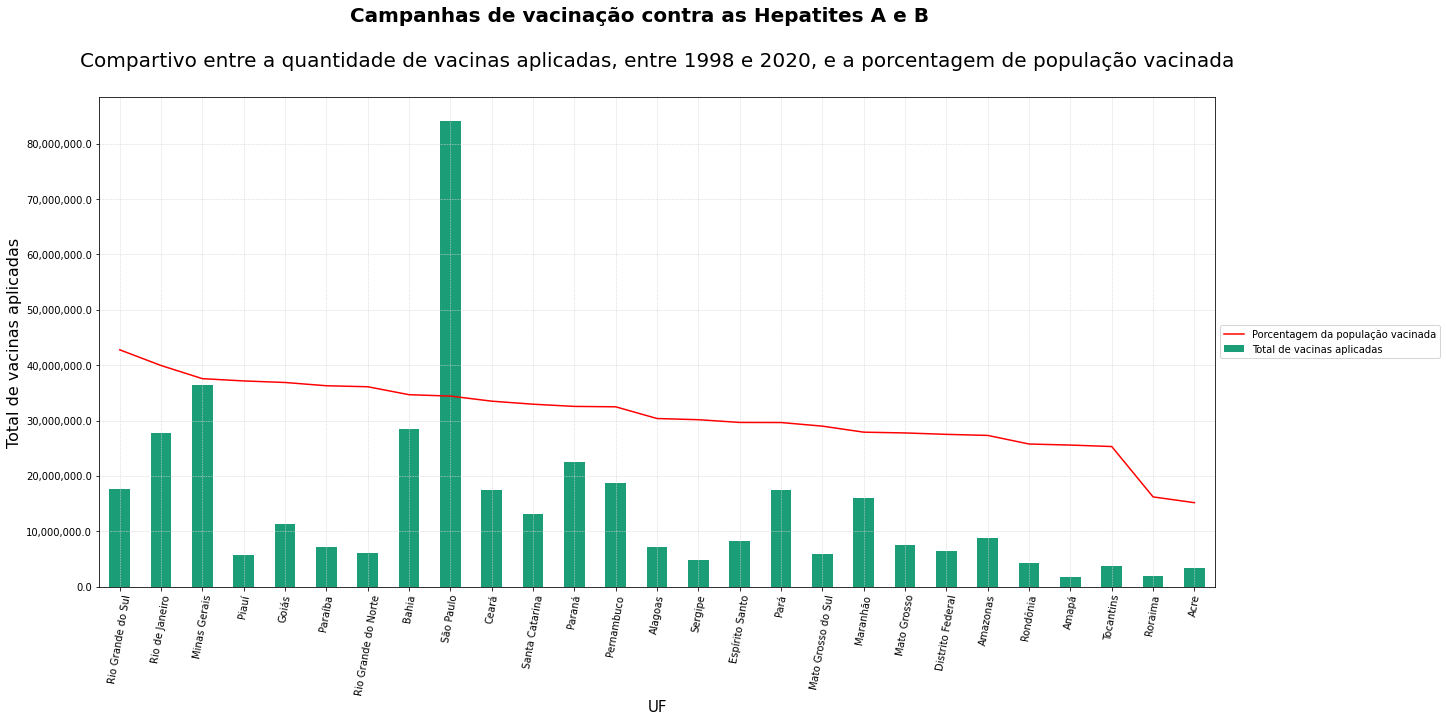

In [464]:
ax = (vacina_detalhado['Porcentagem da população vacinada']*700000).plot(color='red') 
ax = vacina_detalhado['Total de vacinas aplicadas'].plot(kind='bar', colormap = 'Dark2')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,}'))

plt.suptitle("Campanhas de vacinação contra as Hepatites A e B", size=20, weight='bold' ).set_position([.5, 1.02])
plt.title('Compartivo entre a quantidade de vacinas aplicadas, entre 1998 e 2020, e a porcentagem de população vacinada',{'fontsize': 20}).set_position([.5, 1.05])

plt.ylabel("Total de vacinas aplicadas", size = 16)
plt.xlabel("UF", size = 15)
plt.xticks(rotation=80)
plt.grid(color='lightgrey', linestyle='--', linewidth=.5)
plt.show()

## Com os dados transpostos para o gráfico acima, é possível verificar que, o número absoluto de doses aplicadas somente, não identifica que a campanha de vacinação atingiu uma alta porcentagem da população. Se vericarmos a reta a cruza o gráfico, identificamos que a imunização da população está entre 60% e 40% na maioria dos estados. Porém ao analisarmos os três estados com a mais baixa taxa de imunização, encontramos Acre e Roraima, os mesmo dois estados onde o número de óbitos (e consequente, os valores gastos em despasas nos hospitais) foram os mais altos encontrados na análise anterior. Entretanto, o estado que teve o maior índice de imunização contra hepatite (Rio Grande do Sul), figura entre os dez estados com alta despesa relacionados aos óbitos por hepatites. Em contra partida, Rio de Janeiro, o segundo estado proporcionalmente mais vacinou (57,05%), aparece como penúltimo na lista de maiores gastos hospitalares, com 4,15 mortes à cada 100 mil habitantes.

## Importante salientar que seria necessário outros informações para entender como os vários tipos de hepatite podem afetar a mortalidade das pessoas em uma estado, citando alguns, dados genéticos que demonstrem a efetividade das vacinas em determinado grupo étnico, dados de campanhas estaduais e federais de prenvenção à hepatites virais, dados dos agentes públicos responsáveis por cobrir as macro e micro regiões determinadas pelo SUS, investimentos públicos nos estudos para elaboração de vacinas etc. 

## De toda forma, com os dados apresentados acima, podemos identificar alguns pontos que podem ser utilizados durante outras processos de epidemia, demonstrando a importância da prevenção e vacinação como as melhores estratégias para redução de custos na rede pública de saúde.